<a href="https://colab.research.google.com/github/Dvdbijl/CO2-Emissions---Final-Assignment/blob/main/CO2_Emissions_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vraag 1


In [7]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_emmissions = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/co-emissions-per-capita.csv")
df_gdp = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/gdp-per-capita-penn-world-table.csv")
df_defor = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/annual-deforestation.csv")
df_meat = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/daily-meat-consumption-per-person.csv")
df_energy = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/share-energy-source-sub.csv")

In [ ]:
print(df_emmissions.head)
print(df_gdp.head)
print(df_defor.head)
print(df_meat.head)
print(df_energy.head)

In [9]:
df_emmissions.rename(columns={'Annual CO₂ emissions (per capita)': "CO2 Emissions"}, inplace=True)
df_gdp.rename(columns={'GDP per capita (output, multiple price benchmarks)': "GDP"}, inplace=True)
df_meat.rename(columns={'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita': "Meat Consumption"}, inplace=True)
df_energy.rename(columns={'Oil (% equivalent primary energy)': "Oil"}, inplace=True)
df_energy.rename(columns={'Coal (% equivalent primary energy)': "Coal"}, inplace=True)
df_energy.rename(columns={'Solar (% equivalent primary energy)': "Solar"}, inplace=True)
df_energy.rename(columns={'Nuclear (% equivalent primary energy)': "Nuclear"}, inplace=True)
df_energy.rename(columns={'Hydro (% equivalent primary energy)': "Hydro"}, inplace=True)
df_energy.rename(columns={'Wind (% equivalent primary energy)': "Wind"}, inplace=True)
df_energy.rename(columns={'Gas (% equivalent primary energy)': "Gas"}, inplace=True)
df_energy.rename(columns={'Other renewables (% equivalent primary energy)': "Other renewables"}, inplace=True)


In [10]:
df_emmissions.drop(['Code'], axis=1, inplace=True)
df_gdp.drop(['Code'], axis=1, inplace=True)
df_defor.drop(['Code'], axis=1, inplace=True)
df_meat.drop(['Code'], axis=1, inplace=True)
df_energy.drop(['Code'], axis=1, inplace=True)

In [11]:
data_frames = [df_emmissions, df_gdp, df_defor, df_meat, df_energy]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity', 'Year'], how='outer'), data_frames)

df_merged.dropna(inplace=True)
df_merged.drop(['Year'], axis=1, inplace=True)

In [20]:
print(df_merged.corr(method='pearson'))

                  CO2 Emissions       GDP  Deforestation  Meat Consumption  \
CO2 Emissions          1.000000  0.634079      -0.196894          0.683973   
GDP                    0.634079  1.000000      -0.206382          0.634101   
Deforestation         -0.196894 -0.206382       1.000000         -0.059704   
Meat Consumption       0.683973  0.634101      -0.059704          1.000000   
Oil                   -0.222441 -0.052776       0.108038         -0.057834   
Coal                   0.203213 -0.212589      -0.009559         -0.065279   
Solar                  0.044064  0.230286      -0.079645          0.146939   
Nuclear                0.206223  0.276511      -0.149395          0.204662   
Hydro                 -0.067282  0.278492       0.183700          0.119973   
Wind                   0.066739  0.387985      -0.088723          0.214692   
Gas                   -0.089096 -0.147307      -0.163691         -0.126147   
Other renewables       0.146582  0.372814      -0.007796        

<ipython-input-20-25ddfe16bc6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_merged.corr(method='pearson'))


In [19]:
print(df_merged.corr())

                  CO2 Emissions       GDP  Deforestation  Meat Consumption  \
CO2 Emissions          1.000000  0.634079      -0.196894          0.683973   
GDP                    0.634079  1.000000      -0.206382          0.634101   
Deforestation         -0.196894 -0.206382       1.000000         -0.059704   
Meat Consumption       0.683973  0.634101      -0.059704          1.000000   
Oil                   -0.222441 -0.052776       0.108038         -0.057834   
Coal                   0.203213 -0.212589      -0.009559         -0.065279   
Solar                  0.044064  0.230286      -0.079645          0.146939   
Nuclear                0.206223  0.276511      -0.149395          0.204662   
Hydro                 -0.067282  0.278492       0.183700          0.119973   
Wind                   0.066739  0.387985      -0.088723          0.214692   
Gas                   -0.089096 -0.147307      -0.163691         -0.126147   
Other renewables       0.146582  0.372814      -0.007796        

<ipython-input-19-28d425fc1e46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_merged.corr())


In [ ]:
np.triu(np.ones_like(df_merged.corr()))

<ipython-input-14-dda31ad7f099>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_merged.corr()))
<ipython-input-14-dda31ad7f099>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_merged.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


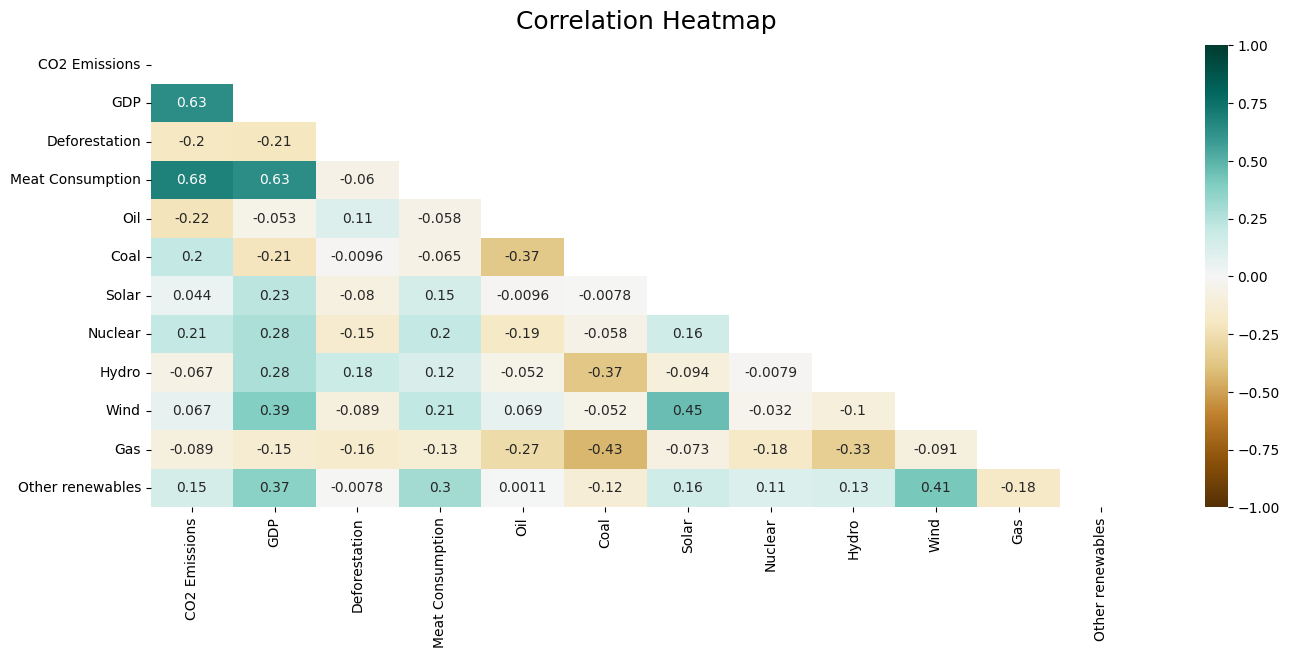

In [14]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_merged.corr()))
heatmap = sns.heatmap(df_merged.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
df_merged.corr()[['CO2 Emissions']].sort_values(by='CO2 Emissions', ascending=False)

<ipython-input-16-673f3e6a7ac1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_merged.corr()[['CO2 Emissions']].sort_values(by='CO2 Emissions', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


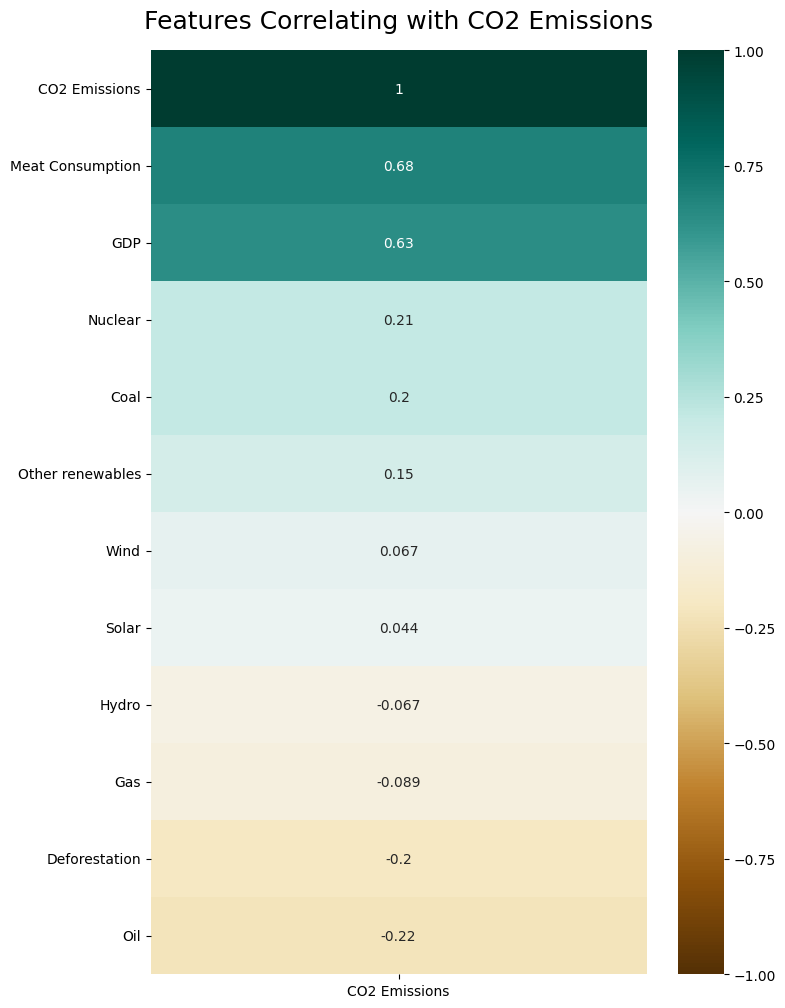

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_merged.corr()[['CO2 Emissions']].sort_values(by='CO2 Emissions', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with CO2 Emissions', fontdict={'fontsize':18}, pad=16);

#Vraag 2

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

In [18]:
df_pop = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/population-and-demography.csv")
df_annualco2 = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/annual-co2-emissions-per-country.csv")

In [ ]:
print(df_pop.head)
print(df_annualco2)

In [19]:
df_pop.rename(columns={'Country name': "Entity"}, inplace=True)
df_annualco2.rename(columns={'Annual CO₂ emissions': "CO2"}, inplace=True)
df_annualco2.drop(['Code'], axis=1, inplace=True)

In [20]:
data_frames = [df_pop, df_annualco2]
df = reduce(lambda  left,right: pd.merge(left,right,on=['Entity', 'Year'], how='outer'), data_frames)

df.dropna(inplace=True)

In [ ]:
display(df)

In [21]:
df.drop(df.columns[3:24], axis=1, inplace=True)

In [22]:
df['CO2 Capita'] = df.CO2 / df.Population

In [ ]:
display(df)

In [23]:
df['PC Population'] = df.groupby('Entity')['Population'].pct_change() * 100
df['PC CO2'] = df.groupby('Entity')['CO2'].pct_change() * 100
df['PC CO2 Capita'] = df.groupby('Entity')['CO2 Capita'].pct_change() * 100

df.dropna(inplace=True)

In [ ]:
display(df)

In [ ]:
grouped_data = df.groupby('Entity')

def calculate_sum_change_last_10_years(group):
    # Sort the data by 'Year' within each group
    group = group.sort_values('Year')

    # Calculate CO2 emissions per capita
    group['CO2 Change'] = group['PC CO2'] - group['PC CO2 Capita']

    # Get the CO2 emissions per capita for the last 10 years
    last_10_years = group['CO2 Change'].tail(10)

    # Calculate the sum of changes in CO2 emissions per capita over the last 10 years
    sum_change_last_10_years = last_10_years.diff().sum()

    # Assign the sum of changes to all rows of the last 10 years
    group.loc[group['Year'] >= group['Year'].max() - 9, 'Change Last Decade'] = sum_change_last_10_years

    return group

# Apply the function to each group
result_new = grouped_data.apply(calculate_sum_change_last_10_years)


In [ ]:
display(result_new)

In [ ]:
df_filtered = result_new.query('Year >= 2021')
display(df_filtered)

In [ ]:
plot_df = df_filtered[['Entity', 'Change Last Decade']].copy()
display(plot_df)

In [38]:
# Sort the DataFrame by the 'Change Last Decade' column in ascending order
plot_df = plot_df.sort_values(by='Change Last Decade', ascending=True)

# Select the top 10 rows
top_10 = plot_df.head(10)

display(top_10)

,Entity,Change Last Decade
8423,Kuwait,-11.297449
12599,Oman,-10.781287
13463,Qatar,-8.906397
14975,Sint Maarten (Dutch part),-5.400222
8927,Lebanon,-4.160623
15551,South Sudan,-3.008300
14543,Saudi Arabia,-2.586529
17783,Venezuela,-2.516189
10079,Maldives,-2.403697
7487,Iraq,-2.397444


In [ ]:
top_10.set_index('Entity', inplace=True)
top_10['Change Last Decade Positive'] = top_10['Change Last Decade'].abs()
top_10.drop(columns=['Change Last Decade'], inplace=True)

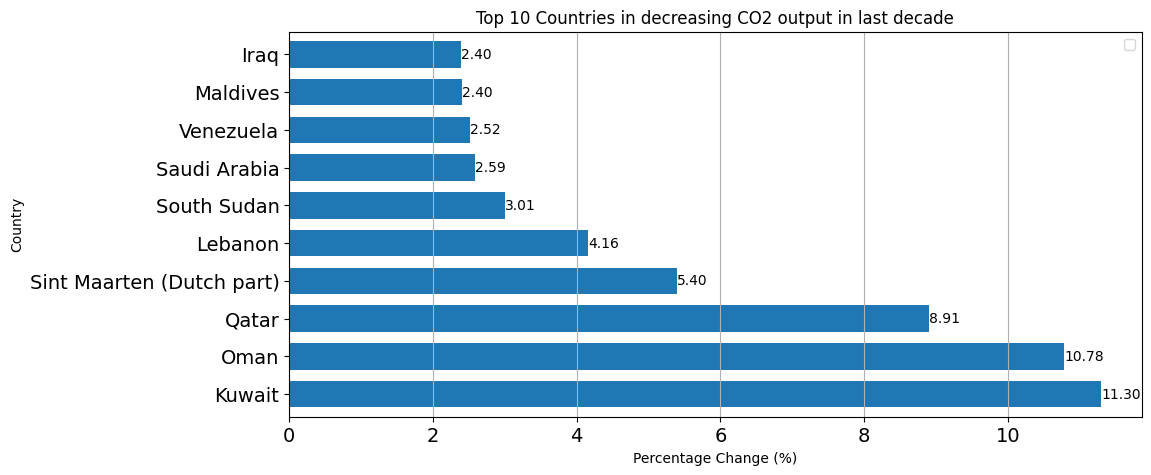

In [37]:
ax = top_10.plot.barh(width=0.7, fontsize='14', figsize=(11,5));

plt.xlabel('Percentage Change (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries in decreasing CO2 output in last decade')
plt.grid(axis='x')
plt.legend([])

for bar in ax.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             ha='left', va='center')

#Vraag 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data - hypothetical non-fossil fuel energy prices over time for different resources
data = {
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Price_per_MWh_Wind': [50, 45, 42, 40, 38],  # Hypothetical prices in $/MWh for Wind
    'Price_per_MWh_Solar': [60, 55, 52, 48, 45],  # Hypothetical prices in $/MWh for Solar
    'Price_per_MWh_Hydro': [45, 42, 40, 38, 36]  # Hypothetical prices in $/MWh for Hydro
}

# Create a DataFrame
df_test = pd.DataFrame(data)

# Melt the DataFrame to have one row per (Year, Price_per_MWh, Energy resource) combination
melted_df_test = pd.melt(df_test, id_vars=['Year'], var_name='Energy_Resource', value_name='Price_per_MWh')

# Prepare the data for linear regression
X = melted_df_test[['Year']]  # Features (independent variable)
y = melted_df_test['Price_per_MWh']  # Target (dependent variable)

# Fit a linear regression model for each energy resource
models = {}
for resource in melted_df_test['Energy_Resource'].unique():
    resource_data = melted_df_test[melted_df_test['Energy_Resource'] == resource]
    model = LinearRegression()
    model.fit(resource_data[['Year']], resource_data['Price_per_MWh'])
    models[resource] = model

# Predict future prices for each energy resource
future_years = np.array([[2025], [2026]])  # Future years to predict
future_prices = {}
for resource, model in models.items():
    future_prices[resource] = model.predict(future_years)

# Visualize the results
plt.figure(figsize=(10, 6))
for resource, model in models.items():
    resource_data = melted_df_test[melted_df_test['Energy_Resource'] == resource]
    plt.plot(resource_data['Year'], model.predict(resource_data[['Year']]), label=resource)
    plt.scatter(future_years, future_prices[resource])
plt.xlabel('Year')
plt.ylabel('Price per MWh ($)')
plt.title('Non-fossil fuel energy prices over time with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
display(melted_df_test)

In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [40]:
df = pd.read_csv("https://github.com/Dvdbijl/CO2-Emissions---Final-Assignment/raw/main/levelized-cost-of-energy.csv")

In [ ]:
df.dropna(inplace=True)
df.drop(['Code', 'Entity'], axis=1, inplace=True)
display(df)

In [42]:
df.columns = df.columns.str.replace(' levelized cost of energy', '')
#df.set_index('Year', inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

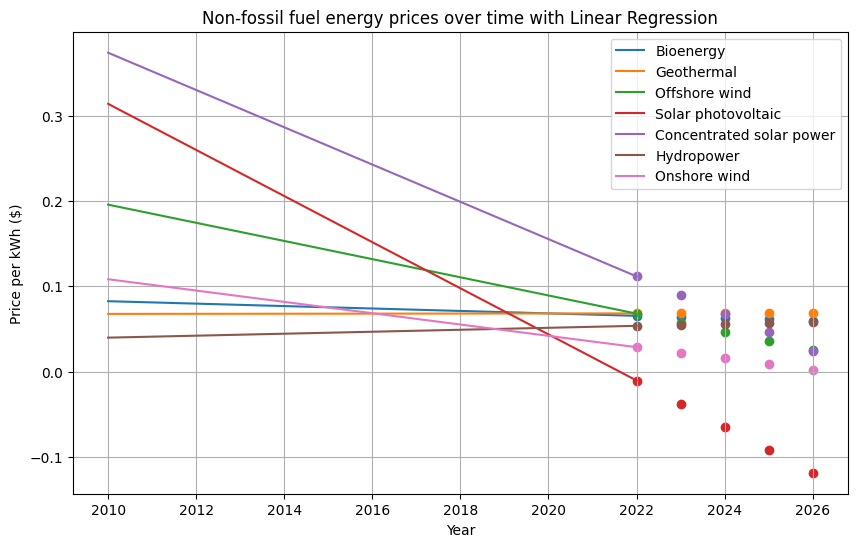

In [43]:
# Melt the DataFrame to have one row per (Year, Price_per_MWh, Energy resource) combination
melted_df = pd.melt(df, id_vars=['Year'], var_name='Energy Resource', value_name='Price per kWh')

# Prepare the data for linear regression
X = melted_df[['Year']]  # Features (independent variable)
y = melted_df['Price per kWh']  # Target (dependent variable)

# Fit a linear regression model for each energy resource
models = {}
for resource in melted_df['Energy Resource'].unique():
    resource_data = melted_df[melted_df['Energy Resource'] == resource]
    model = LinearRegression()
    model.fit(resource_data[['Year']], resource_data['Price per kWh'])
    models[resource] = model

# Predict future prices for each energy resource
future_years = np.array([[2022], [2023], [2024], [2025], [2026]])  # Future years to predict
future_prices = {}
for resource, model in models.items():
    future_prices[resource] = model.predict(future_years)

# Visualize the results
plt.figure(figsize=(10, 6))
for resource, model in models.items():
    resource_data = melted_df[melted_df['Energy Resource'] == resource]
    plt.plot(resource_data['Year'], model.predict(resource_data[['Year']]), label=resource)
    plt.scatter(future_years, future_prices[resource])
plt.xlabel('Year')
plt.ylabel('Price per kWh ($)')
plt.title('Non-fossil fuel energy prices over time with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
